In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation
import statsmodels.api as sm

/var/folders/sl/syqsj8q94yn7kbv8l50mtwdw0000gn/T/ipykernel_31959/3501625496.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, normaltest
/var/folders/sl/syqsj8q94yn7kbv8l50mtwdw0000gn/T/ipykernel_31959/3501625496.py:8: DeprecationWarning: Please use `normaltest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, normaltest


### Importing Data / Setting Seed  / Making Test and Training Sets

In [3]:
data = pd.read_csv('insurance.csv')

#Creating Samples
np.random.seed(2)

train = data.sample(round(data.shape[0]*.8)) # 80%
test = data.drop(train.index)

### Binning BMI

In [4]:
binned_bmi = pd.cut(train['bmi'], [0,18.5,25,30,35,60], right = False, retbins = True)
bins = [0,18.5,25,30,35,60]


train['bmi_binned'] = pd.cut(data['bmi'], bins = bins, right = False)
test['bmi_binned'] = pd.cut(data['bmi'], bins = bins, right = False)

### Current Model

In [5]:
#df = train, formula = 'charges ~ age + binned_bmi*smoker + children + region'

ols_object = smf.ols(formula = 'charges ~ age + sex + bmi_binned*smoker + children + region', data = train)
model = ols_object.fit()
print(model.summary())

#Stats
pred = model.predict(test)

print('RMSE:',np.sqrt(((test.charges - pred)**2).mean()))
print('RSE:', np.sqrt(model.mse_resid))
print('R2:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     465.6
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:15:08   Log-Likelihood:                -10520.
No. Observations:                1070   AIC:                         2.107e+04
Df Residuals:                    1054   BIC:                         2.115e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Residual Plots

<Axes: xlabel='region'>

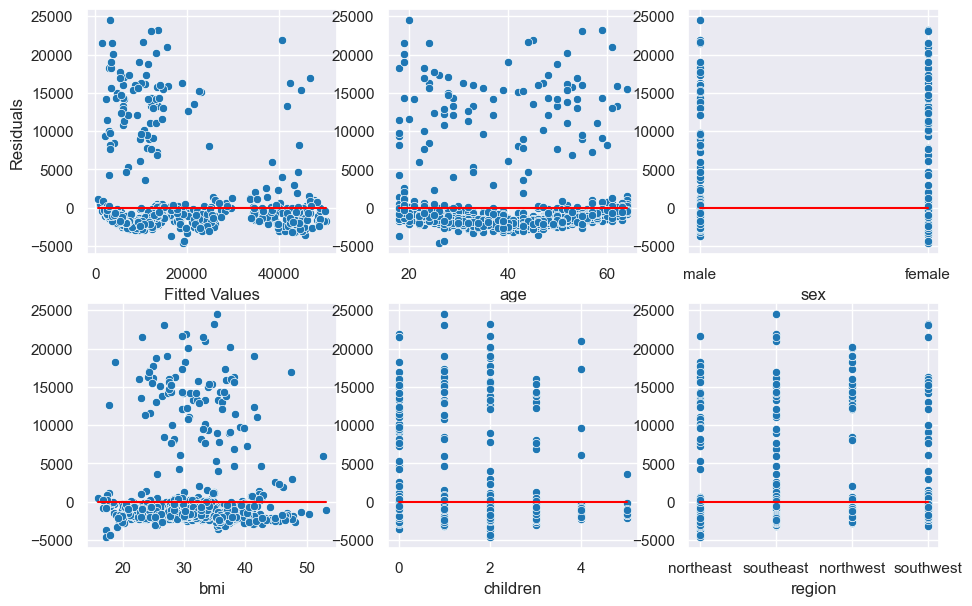

In [6]:
sns.set(font_scale = 1)
plt.rcParams["figure.figsize"] = (11, 7)
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0][0], x = model.fittedvalues, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][0], x = [model.fittedvalues.min(), model.fittedvalues.max()], y = [0,0], color = 'red')
axes[0][0].set(xlabel = 'Fitted Values', ylabel = 'Residuals')

sns.scatterplot(ax = axes[0][1], x = train.age, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][1], x = [train.age.min(), train.age.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[0][2], x = train.sex, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[0][2], x = [train.sex.min(), train.sex.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][0], x = train.bmi, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][0], x = [train.bmi.min(), train.bmi.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][1], x = train.children, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][1], x = [train.children.min(), train.children.max()], y = [0,0], color = 'red')

sns.scatterplot(ax = axes[1][2], x = train.region, y = model.resid, color = '#1f77b4')
sns.lineplot(ax = axes[1][2], x = [train.region.min(), train.region.max()], y = [0,0], color = 'red')